In [1]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets 
import matplotlib.pyplot as plt
from nn import nn  

In [2]:
# Function to load and preprocess MNIST data
mnist = sklearn.datasets.load_digits()
X = mnist.data.astype('float32')
X /= np.max(X)  # Normalize pixel values 

In [3]:
# Split the data into training and validation sets
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

print("training dataset dimensions:", X_train.shape)
print("validation dataset dimensions", X_val.shape)

training dataset dimensions: (1437, 64)
validation dataset dimensions (360, 64)


In [4]:
# Define the architecture of the neural network
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}
]

In [5]:
# Initialize the Neural Network
nn_mnist = nn.NeuralNetwork(
    nn_arch=nn_architecture,
    lr=10, # tried 0.01, 0.1, 
    seed=42,
    batch_size=np.shape(X_train)[0],
    epochs=1000,
    loss_function='_mean_squared_error'
)

In [6]:
# Train the Neural Network
# loss_train, loss_val = nn.fit(X_train, y_train_encoded.T, X_val, y_val_encoded.T)
loss_train, loss_val = nn_mnist.fit(X_train, X_train.T, X_val, X_val.T)

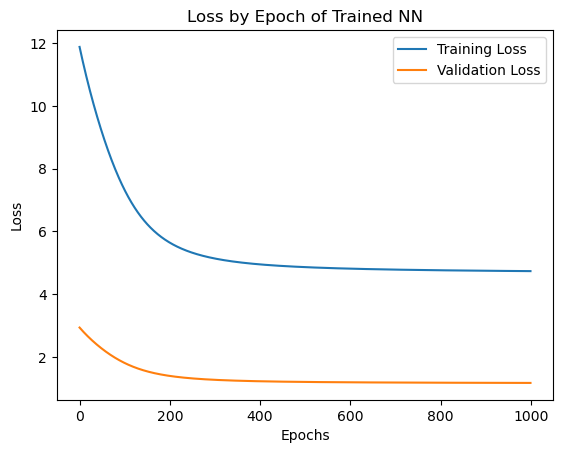

In [30]:
# Plot the training and validation loss
plt.title("Loss by Epoch of Trained NN")
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Make predictions on the validation set
y_val_pred = nn_mnist.predict(X_val)

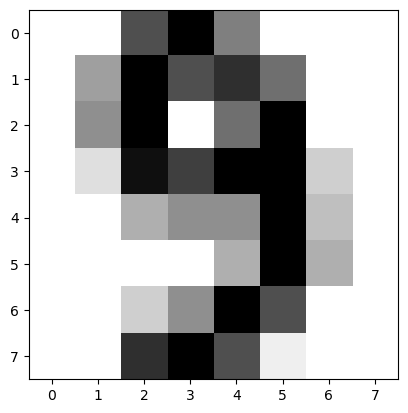

In [9]:
# X_val image 
img = 1
test_img = np.reshape(X_val[img,:], (8, 8))
# print(test_img)
plt.imshow(test_img, cmap=plt.cm.gray_r, interpolation="nearest")

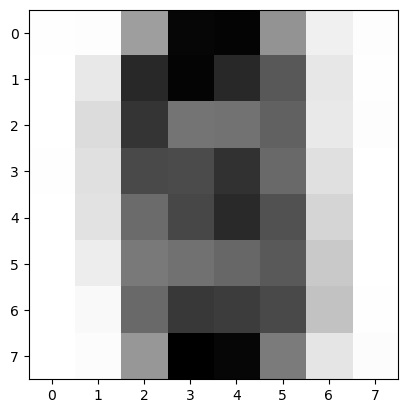

In [10]:
# predicted image
img = 1
test_img = np.reshape(y_val_pred[img], (8, 8))
plt.imshow(test_img, cmap=plt.cm.gray_r, interpolation="nearest")

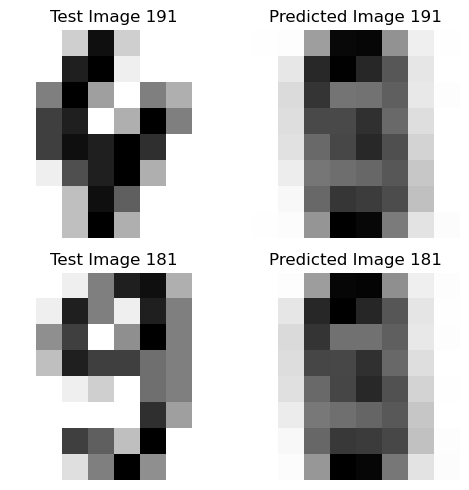

In [11]:
num_samples = 2
indices = np.random.choice(len(X_val), size=num_samples, replace=False)

# Set up the figure
fig, axs = plt.subplots(num_samples, 2, figsize=(5,5))

# Plot the test and predicted images for each index
for i, idx in enumerate(indices):
    # Reshape test and predicted images
    test_img = np.reshape(X_val[idx], (8, 8))
    pred_img = np.reshape(y_val_pred[idx], (8, 8))
    
    # Plot the test image
    axs[i, 0].imshow(test_img, cmap=plt.cm.gray_r, interpolation="nearest")
    axs[i, 0].set_title(f'Test Image {idx}')
    axs[i, 0].axis('off')

    # Plot the predicted image
    axs[i, 1].imshow(pred_img, cmap=plt.cm.gray_r, interpolation="nearest")
    axs[i, 1].set_title(f'Predicted Image {idx}')
    axs[i, 1].axis('off')


plt.tight_layout()
plt.show()

In [49]:
# reconstruction error of trained model
delta_pred = y_val_pred - X_val
error = np.absolute(np.sum(delta_pred,axis = 1 ))
avg_error = np.mean(error)
print("average error of trained model:", avg_error)

average error of trained model: 2.082736371735536


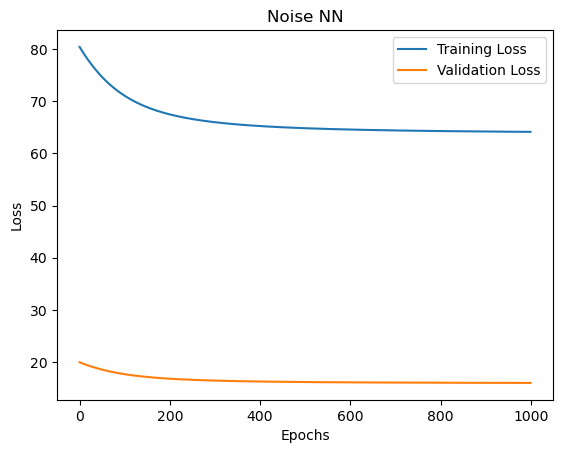

In [43]:
# trained on noise 
# Initialize the Neural Network
nn_noise = nn.NeuralNetwork(
    nn_arch=nn_architecture,
    lr=10, # tried 0.01, 0.1, 
    seed=42,
    batch_size=np.shape(X_train)[0],
    epochs=1000,
    loss_function='_mean_squared_error'
)
# initialize noise with same dimensions as proper parameters 
p1 = np.random.randn(*X_train.shape)
p2 = np.random.randn(*X_train.T.shape)
p3 = np.random.randn(*X_val.shape)
p4 = np.random.randn(*X_val.T.shape)
noise_loss_train, noise_loss_val = nn_noise.fit(p1, p2, p3, p4)

# Plot the training and validation loss
plt.title("Noise NN")
plt.plot(noise_loss_train, label='Training Loss')
plt.plot(noise_loss_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

noise_pred = nn_noise.predict(X_val)

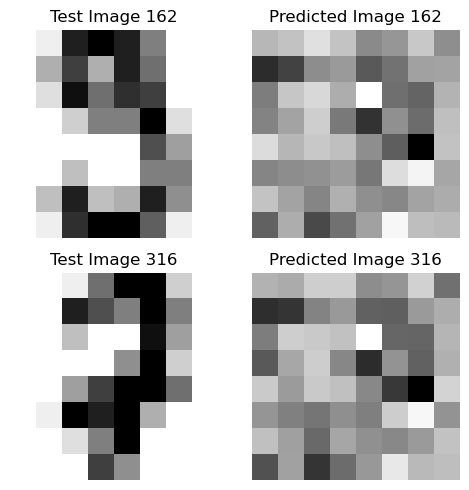

In [44]:
# noise model continued
num_samples = 2
indices = np.random.choice(len(X_val), size=num_samples, replace=False)

# Set up the figure
fig, axs = plt.subplots(num_samples, 2, figsize=(5,5))

# Plot the test and predicted images for each index
for i, idx in enumerate(indices):
    # Reshape test and predicted images
    test_img = np.reshape(X_val[idx], (8, 8))
    pred_img = np.reshape(noise_pred[idx], (8, 8))
    
    # Plot the test image
    axs[i, 0].imshow(test_img, cmap=plt.cm.gray_r, interpolation="nearest")
    axs[i, 0].set_title(f'Test Image {idx}')
    axs[i, 0].axis('off')

    # Plot the predicted image
    axs[i, 1].imshow(pred_img, cmap=plt.cm.gray_r, interpolation="nearest")
    axs[i, 1].set_title(f'Predicted Image {idx}')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [48]:
# reconstruction error of noise model
delta_pred = noise_pred - X_val
error = np.absolute(np.sum(delta_pred,axis = 1 ))
avg_error = np.mean(error)
print("average reconstruction error of noise model:", avg_error)

average reconstruction error of noise model: 14.755311029657049


Hyperparameters were chosen manually using a grid search strategy. Best hyperparameters will produce a training loss and validation loss curves that appear to exponentailly decay. Asymptotes of both curves should be close to each other. 
- learning rate, lr = 10, tried 0.01, 0.1, 
- batch size, batch_size = all datapoints
- epochs, epochs = 1000, tried 100, 5000
- loss function, loss_function = '_mean_squared_error', tried '_binary_cross_entropy' and '_mean_squared_error'